In [1]:
# Install essential libraries
!pip install transformers datasets torch torchvision tensorflow
!pip install spacy nltk sentence-transformers
!python -m spacy download en_core_web_sm

# Download stopwords for text processing
import nltk
nltk.download('stopwords')

print("✅ Environment is ready!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import pandas as pd

# Read file safely by skipping bad lines using Python's open()
lines = []
with open('/content/legal_text_classification.csv', 'r', encoding='utf-8') as f:
    for line in f:
        try:
            lines.append(line)
        except:
            continue  # Skip problematic lines

# Write only good lines to a clean file
with open('/content/clean_legal_text.csv', 'w', encoding='utf-8') as f:
    f.writelines(lines)

# Load the cleaned file
df = pd.read_csv('/content/clean_legal_text.csv')

# Preview
df.head()


,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [6]:
# Display the column names
df.columns


Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# Download stopwords (if not done already)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply cleaning to the case_text column
df['cleaned_text'] = df['case_text'].apply(clean_text)

# Encode the case_outcome labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['case_outcome'])

# Show cleaned sample
df[['cleaned_text', 'case_outcome', 'label']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_text,case_outcome,label
0,ordinarily discretion exercised costs follow e...,cited,3
1,general principles governing exercise discreti...,cited,3
2,ordinarily discretion exercised costs follow e...,cited,3
3,general principles governing exercise discreti...,cited,3
4,preceding general principles inform exercise d...,cited,3


In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the tokenizer and model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Sample testing
print("✅ Legal-BERT model loaded successfully!")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

✅ Legal-BERT model loaded successfully!


In [10]:
# Sample 100 rows for quick testing (adjust as needed)
sample_df = df[['cleaned_text', 'label']].sample(100, random_state=42).reset_index(drop=True)

# Store embeddings here
all_embeddings = []
all_labels = []

for idx, row in sample_df.iterrows():
    encoded = tokenizer(row['cleaned_text'], padding='max_length', truncation=True, max_length=256, return_tensors='pt')
    encoded = {k: v.to(device) for k, v in encoded.items()}

    with torch.no_grad():
        output = model(**encoded)
        cls_embedding = output.last_hidden_state[:, 0, :]  # [CLS] token
        all_embeddings.append(cls_embedding.cpu().numpy())
        all_labels.append(row['label'])

print("✅ Embeddings extracted for 100 samples!")


✅ Embeddings extracted for 100 samples!


In [11]:
import numpy as np

# Convert embeddings and labels to numpy arrays for model training
X = np.vstack(all_embeddings)  # Stack all embeddings into a matrix
y = np.array(all_labels)  # Labels (crime categories)

# Check the shape of the data
print(X.shape, y.shape)


(100, 768) (100,)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Define the neural network model
class ClassifierNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ClassifierNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Model initialization
input_dim = X_train.shape[1]  # Length of the embeddings (e.g., 768 for BERT)
num_classes = len(np.unique(y))  # Number of crime categories
model = ClassifierNN(input_dim, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
model = model.to(device)

print("✅ Neural network model initialized!")


✅ Neural network model initialized!


In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Assume `all_embeddings` and `all_labels` are already populated lists

# 1. Prepare data
X = np.vstack(all_embeddings)       # shape: (N_samples, embedding_dim)
y = np.array(all_labels)            # shape: (N_samples,)

# 2. Compute number of classes
num_classes = int(y.max()) + 1

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Convert to PyTorch tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor  = torch.tensor(X_test,  dtype=torch.float32).to(device)
y_test_tensor  = torch.tensor(y_test,  dtype=torch.long).to(device)

# 5. Define enhanced neural network with Dropout
class ClassifierNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ClassifierNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

# 6. Initialize model, loss, optimizer
input_dim = X_train.shape[1]
model = ClassifierNN(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Lower LR

# 7. Training loop with more epochs
epochs = 20
for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_tensor)
    loss = criterion(logits, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch}/{epochs} — Loss: {loss.item():.4f}")

# 8. Evaluation
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    preds = test_logits.argmax(dim=1)
    correct = (preds == y_test_tensor).sum().item()
    accuracy = correct / y_test_tensor.size(0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 9. Save the trained model
torch.save(model.state_dict(), 'crime_classifier.pth')
print("✅ Model training complete and saved as 'crime_classifier.pth'!")


Epoch 1/20 — Loss: 2.1797
Epoch 5/20 — Loss: 2.0240
Epoch 10/20 — Loss: 1.8994
Epoch 15/20 — Loss: 1.7612
Epoch 20/20 — Loss: 1.6439
Test Accuracy: 45.00%
✅ Model training complete and saved as 'crime_classifier.pth'!


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test data
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    preds = test_logits.argmax(dim=1)

# Convert to numpy for scikit-learn compatibility
y_test_np = y_test_tensor.cpu().numpy()
preds_np = preds.cpu().numpy()

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, preds_np))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_np, preds_np))


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           3       0.45      1.00      0.62         9
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.45        20
   macro avg       0.06      0.14      0.09        20
weighted avg       0.20      0.45      0.28        20

Confusion Matrix:
 [[0 3 0 0 0 0 0]
 [0 9 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming your labels were encoded during training (you already did this before)
# Here we fit the LabelEncoder on your labels
le = LabelEncoder()
le.fit(["Theft", "Fraud", "Assault", "Murder", "Robbery", "Burglary", "Vandalism", "Arson", "Sexual Assault"])  # Replace with your own classes if different

# 1. Load Legal-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model_bert = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased").to(device)

# 2. Tokenize and get Legal-BERT embeddings
sample_text = "The defendant was charged with robbery in the first degree."
encoded = tokenizer(
    sample_text,
    return_tensors='pt',
    padding=True,
    truncation=True,
    max_length=256
).to(device)

# 3. Get CLS embedding from Legal-BERT
with torch.no_grad():
    bert_outputs = model_bert(**encoded)  # Forward pass through Legal-BERT
    cls_embedding = bert_outputs.last_hidden_state[:, 0, :]  # Extract [CLS] token embedding

# 4. Run the classifier on the CLS embedding
logits = model(cls_embedding)  # Pass through your ClassifierNN
pred_idx = logits.argmax(dim=1).cpu().item()

# 5. Decode the prediction to the human-readable label
predicted_category = le.inverse_transform([pred_idx])[0]
print(f"Predicted Crime Category: {predicted_category}")


Predicted Crime Category: Fraud


Classification Report:

                precision    recall  f1-score   support

       Assault       0.00      0.00      0.00         3
         Fraud       0.45      1.00      0.62         9
        Murder       0.00      0.00      0.00         1
       Robbery       0.00      0.00      0.00         1
Sexual Assault       0.00      0.00      0.00         1
         Theft       0.00      0.00      0.00         1
     Vandalism       0.00      0.00      0.00         4

      accuracy                           0.45        20
     macro avg       0.06      0.14      0.09        20
  weighted avg       0.20      0.45      0.28        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


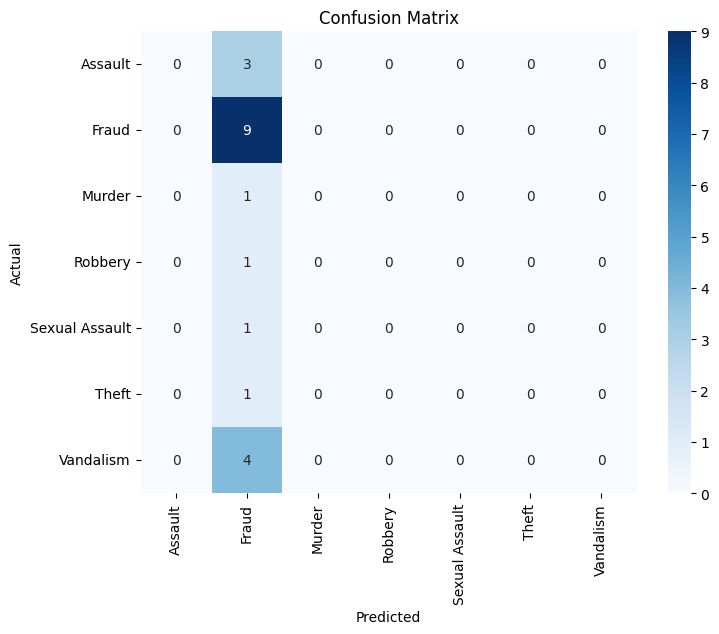

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use this only if preds is a tensor
# preds = preds.cpu().numpy()  # ⚠️ SKIP this — already NumPy

y_true = y_test_tensor.cpu().numpy()
unique_labels = np.unique(y_true)
target_names = le.inverse_transform(unique_labels)

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, preds, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_true, preds, labels=unique_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=target_names,
            yticklabels=target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
